# Sleep analysis

It has been more than 6 months since I have been tracking my sleep data. I bought a Samsung Galaxy Watch Active 2 which allowed me to track every stages of my sleep, every night.

The goal of this project is to analyse my sleep and see if I can find any correlations between my sleep quality and other external factors.

I have read the book "Why We Sleep" written by Matthew Walker which enlightened my analysis. It helped me understand my data and made me discover precious advices on how I should sleep in the future.

**NREM (Non-Rapid Eye Movement) sleep and REM (Rapid Eye Movement) sleep are the defining pillars of sleep.**

NREM sleep includes Light Sleep and Deep sleep while REM sleep is the dreaming phase of sleep. According to Matthew Walker's book: <i> "a key function of **deep NREM sleep**, which predominates early in the night, is to **do the work of weeding out and removing unnecessary neural connections**. In contrast, the dreaming stage of **REM sleep**, which prevails later in the night, **plays a role in strengthening those connections**." </i>

Both sleeps are essential for a human-being! In the book I have discovered that: <i> "At least two features define human beings relative to other primates. I posit that both have been beneficially and causally shaped by the hand of sleep, and specifically our **intense degree of REM sleep** relative to all other mammals: (1) **our degree of sociocultural complexity**, and (2) **our cognitive intelligence**. REM sleep, and the act of dreaming itself, lubricates both of these human traits." </i>

**REM sleep** is also an important sleep phase which fosters **creativity**.


*Data: 01/09/2020 - 07/04/2021*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

# Data processing

In [2]:
sleep_data = pd.read_csv('sleep_data_2021_04_07.csv', sep=',', skiprows=[0], names=['start_time','sleep_id','custom','update_time','create_time','stage','time_offset','deviceuuid','pkg_name','end_time','datauuid']).drop(0).reset_index().drop('index',axis=1)

In [3]:
sleep_data.head()

,start_time,sleep_id,custom,update_time,create_time,stage,time_offset,deviceuuid,pkg_name,end_time,datauuid
0,2020-09-01 23:22:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40001,UTC+0300,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-01 23:26:00.000,3713d761-0e35-bae5-ae2e-bdb42c2e1536
1,2020-09-01 23:26:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40003,UTC+0300,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-01 23:29:00.000,fdd050da-105d-5b4a-f2ab-912ff6525875
2,2020-09-02 00:06:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40001,UTC+0300,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:07:00.000,14e84561-24b1-3e71-85aa-93587f4ef8ad
3,2020-09-01 23:49:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40002,UTC+0300,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:06:00.000,72ec0096-b482-f885-2580-a6f95f91af15
4,2020-09-02 00:49:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40001,UTC+0300,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:50:00.000,37ad3e9b-3536-0705-86e0-530728f05faf


In [4]:
sleep_data.drop(['custom','sleep_id','deviceuuid','pkg_name','datauuid'],axis=1, inplace=True)

In [5]:
sleep_data.head()

,start_time,update_time,create_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40001,UTC+0300,2020-09-01 23:26:00.000
1,2020-09-01 23:26:00.000,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40003,UTC+0300,2020-09-01 23:29:00.000
2,2020-09-02 00:06:00.000,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40001,UTC+0300,2020-09-02 00:07:00.000
3,2020-09-01 23:49:00.000,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40002,UTC+0300,2020-09-02 00:06:00.000
4,2020-09-02 00:49:00.000,2020-09-02 07:28:11.493,2020-09-02 07:28:11.493,40001,UTC+0300,2020-09-02 00:50:00.000


In [6]:
#I decide to remove update_time and create_time because they do not look actionable compared to start_time
#and end_time
sleep_data.drop(['update_time','create_time'],axis=1, inplace=True)

In [7]:
sleep_data.head()

,start_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,40001,UTC+0300,2020-09-01 23:26:00.000
1,2020-09-01 23:26:00.000,40003,UTC+0300,2020-09-01 23:29:00.000
2,2020-09-02 00:06:00.000,40001,UTC+0300,2020-09-02 00:07:00.000
3,2020-09-01 23:49:00.000,40002,UTC+0300,2020-09-02 00:06:00.000
4,2020-09-02 00:49:00.000,40001,UTC+0300,2020-09-02 00:50:00.000


| Stage        | Signification           | Description |
| ------------- | :-------------| :------------- |
| 40001      | **Awaken stage of sleep.** | Eyes open. Responsive to external stimuli. |
| 40002      | **Light stage of sleep.** | Breathing slows down and heartbeat becomes regular. Typically lasts between 1 and 20 minutes after falling asleep. |
| 40003 | **Deep stage of sleep.** | Brain waves slow down and become larger. Typically starts 35 - 45 minutes after falling asleep. |
| 40004 | **REM (Rapid Eye Movement) stage of sleep.** | Brain waves similar to waking. Most vivid dreams happen in this stage. Body does not move. |

*https://developer.samsung.com/health/server/partner-only/api-reference/data-types/sleep-stage.html*

In [8]:
def time_offset(x):
    if x == 'UTC+0300':
        x = datetime.timedelta(hours=2)
    elif x == 'UTC+0200':
        x = datetime.timedelta(hours=1)
    return x

In [9]:
sleep_data['time_offset'] = sleep_data['time_offset'].apply(lambda x: time_offset(x))

In [10]:
for i in range(0,len(sleep_data)):
    sleep_data['start_time'].loc[i] = str(datetime.datetime.strptime(sleep_data['start_time'].loc[i], '%Y-%m-%d %H:%M:%S.%f') + sleep_data['time_offset'].loc[i])
    sleep_data['end_time'].loc[i] = str(datetime.datetime.strptime(sleep_data['end_time'].loc[i], '%Y-%m-%d %H:%M:%S.%f') + sleep_data['time_offset'].loc[i])

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
sleep_data.head()

,start_time,stage,time_offset,end_time
0,2020-09-02 01:22:00,40001,02:00:00,2020-09-02 01:26:00
1,2020-09-02 01:26:00,40003,02:00:00,2020-09-02 01:29:00
2,2020-09-02 02:06:00,40001,02:00:00,2020-09-02 02:07:00
3,2020-09-02 01:49:00,40002,02:00:00,2020-09-02 02:06:00
4,2020-09-02 02:49:00,40001,02:00:00,2020-09-02 02:50:00


In [12]:
sleep_data.drop('time_offset',axis=1,inplace=True)

In [13]:
#All the data was mixed up. In here I sort the values by start time.
sleep_data = sleep_data.sort_values('start_time').reset_index().drop('index',axis=1)

In [14]:
sleep_data.head()

,start_time,stage,end_time
0,2020-09-02 01:22:00,40001,2020-09-02 01:26:00
1,2020-09-02 01:26:00,40003,2020-09-02 01:29:00
2,2020-09-02 01:29:00,40002,2020-09-02 01:30:00
3,2020-09-02 01:30:00,40003,2020-09-02 01:33:00
4,2020-09-02 01:33:00,40002,2020-09-02 01:43:00


In [15]:
sleep_data['start_time_date'] = sleep_data['start_time'].apply(lambda x: x.split(' ')[0])
sleep_data['start_time_hour'] = sleep_data['start_time'].apply(lambda x: x.split(' ')[1].split('.')[0])
sleep_data['end_time_date'] = sleep_data['end_time'].apply(lambda x: x.split(' ')[0])
sleep_data['end_time_hour'] = sleep_data['end_time'].apply(lambda x: x.split(' ')[1].split('.')[0])

In [16]:
sleep_data.head()

,start_time,stage,end_time,start_time_date,start_time_hour,end_time_date,end_time_hour
0,2020-09-02 01:22:00,40001,2020-09-02 01:26:00,2020-09-02,01:22:00,2020-09-02,01:26:00
1,2020-09-02 01:26:00,40003,2020-09-02 01:29:00,2020-09-02,01:26:00,2020-09-02,01:29:00
2,2020-09-02 01:29:00,40002,2020-09-02 01:30:00,2020-09-02,01:29:00,2020-09-02,01:30:00
3,2020-09-02 01:30:00,40003,2020-09-02 01:33:00,2020-09-02,01:30:00,2020-09-02,01:33:00
4,2020-09-02 01:33:00,40002,2020-09-02 01:43:00,2020-09-02,01:33:00,2020-09-02,01:43:00


In [17]:
def stage_pairing(x):
    if x == 40001:
        x = 'Awaken'
    elif x == 40002:
        x = 'Light'
    elif x == 40003:
        x = 'Deep'
    else:
        x = 'REM'
    return x

sleep_data['stage'] = sleep_data['stage'].astype('int')
sleep_data['stage_of_sleep'] = sleep_data['stage'].apply(lambda x: stage_pairing(x))

In [18]:
sleep_data.head()

,start_time,stage,end_time,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep
0,2020-09-02 01:22:00,40001,2020-09-02 01:26:00,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken
1,2020-09-02 01:26:00,40003,2020-09-02 01:29:00,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep
2,2020-09-02 01:29:00,40002,2020-09-02 01:30:00,2020-09-02,01:29:00,2020-09-02,01:30:00,Light
3,2020-09-02 01:30:00,40003,2020-09-02 01:33:00,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep
4,2020-09-02 01:33:00,40002,2020-09-02 01:43:00,2020-09-02,01:33:00,2020-09-02,01:43:00,Light


In [19]:
sleep_data.drop(['start_time','stage','end_time'], axis=1, inplace=True)

In [20]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light


In [21]:
#I will drop rows from today's date (07/04/2021) so that it does not create any issues in later stages...
sleep_data.drop(sleep_data[sleep_data['start_time_date']=='2021-04-07'].index,inplace=True)

In [22]:
#Dates and hours are strings. I need to find a way to translate them into time values. I want to create a new
#column "Duration" to calculate the duration of each sleeping phase.

In [23]:
sleep_data['Duration'] = 0

for i in range(0,len(sleep_data)):
    sleep_data['Duration'].loc[i] = str((datetime.datetime.strptime(sleep_data['end_time_hour'].loc[i], '%H:%M:%S') - datetime.datetime.strptime(sleep_data['start_time_hour'].loc[i], '%H:%M:%S')))
    if sleep_data['Duration'].loc[i].find('day')!=-1:
        sleep_data['Duration'].loc[i] = sleep_data['Duration'].loc[i].split(', ')[1]
sleep_data['Duration'] = pd.to_timedelta(sleep_data['Duration'],errors='ignore')

In [24]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken,00:04:00
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep,00:03:00
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light,00:01:00
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep,00:03:00
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light,00:10:00


In [25]:
sleep_data['start_time_date_reworked']=0
for i in range(0, len(sleep_data)):
    if sleep_data['start_time_hour'].loc[i]>'22:00:00':
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d')
    elif sleep_data['start_time_hour'].loc[i] < '13:00:00':
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d') - datetime.timedelta(days=1)
    elif sleep_data['start_time_hour'].loc[i] >= '13:00:00' and sleep_data['start_time_hour'].loc[i] <= '22:00:00':
        sleep_data.drop(i,inplace=True)
    else:
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d')

In [26]:
#pd.set_option('display.max_rows', len(sleep_data))

sleep_data

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light,00:10:00,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
16986,2021-04-06,11:11:00,2021-04-06,11:14:00,Light,00:03:00,2021-04-05 00:00:00
16987,2021-04-06,11:14:00,2021-04-06,11:16:00,Awaken,00:02:00,2021-04-05 00:00:00
16988,2021-04-06,11:16:00,2021-04-06,11:24:00,REM,00:08:00,2021-04-05 00:00:00
16989,2021-04-06,11:24:00,2021-04-06,11:26:00,Awaken,00:02:00,2021-04-05 00:00:00


In [27]:
sleep_data_gb = sleep_data[['start_time_date_reworked','stage_of_sleep','Duration']]

In [28]:
sleep_data_gb.head()

,start_time_date_reworked,stage_of_sleep,Duration
0,2020-09-01 00:00:00,Awaken,00:04:00
1,2020-09-01 00:00:00,Deep,00:03:00
2,2020-09-01 00:00:00,Light,00:01:00
3,2020-09-01 00:00:00,Deep,00:03:00
4,2020-09-01 00:00:00,Light,00:10:00


In [29]:
sleep_data_final = sleep_data_gb.groupby(['start_time_date_reworked','stage_of_sleep']).sum().unstack().reset_index()
sleep_data_final.columns = sleep_data_final.columns.get_level_values(1)
sleep_data_final = pd.DataFrame(sleep_data_final)
sleep_data_final.columns = ['Date','Awaken','Deep','Light','REM']
#sleep_data_final.replace('NaT',0,inplace=True)
sleep_data_final.fillna(0,inplace=True)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  


In [30]:
sleep_data_final['Total'] = sleep_data_final['Awaken']+sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']

In [31]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00


In [32]:
sleep_data_final['Weekend'] = 0
for i in range(0, len(sleep_data_final)):
    if datetime.date.weekday(sleep_data_final['Date'].loc[i]) < 4:
        sleep_data_final['Weekend'].loc[i] = 0
    elif datetime.date.weekday(sleep_data_final['Date'].loc[i]) == 6:
        sleep_data_final['Weekend'].loc[i] = 0
    else:
        sleep_data_final['Weekend'].loc[i] = 1

**Weekend = 0 =>** *Monday, Tuesday, Wednesday, Thursday, Sunday*

**Weekend = 1 =>** *Friday, Saturday*

I put 1 to Fridays and Saturdays because the night between Friday and Saturday is inputed to Friday while the night between Saturday and Sunday is inputed to Saturday.

In [33]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,1
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [34]:
print('My minimum bed time is:',sleep_data_final['Total'].min())
print('My maximum bed time is:',sleep_data_final['Total'].max())
print('My average bed time is:',sleep_data_final['Total'].mean())
print('My average bed time during weekdays is:',sleep_data_final[sleep_data_final['Weekend']==0]['Total'].mean())
print('My average bed time during weekends is:',sleep_data_final[sleep_data_final['Weekend']==1]['Total'].mean())

print('\n')

print('My minimum sleep time is:',(sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']).min())
print('My maximum sleep time is:',(sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']).max())
print('My average sleep time is:',(sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']).mean())

d = 0
a = sleep_data_final[sleep_data_final['Weekend']==d]['Deep']
b = sleep_data_final[sleep_data_final['Weekend']==d]['Light']
c = sleep_data_final[sleep_data_final['Weekend']==d]['REM']

print('My average sleep time during weekdays is:',(a+b+c).mean())

d = 1
a = sleep_data_final[sleep_data_final['Weekend']==d]['Deep']
b = sleep_data_final[sleep_data_final['Weekend']==d]['Light']
c = sleep_data_final[sleep_data_final['Weekend']==d]['REM']

print('My average sleep time during weekends is:',(a+b+c).mean())

print('\n')

print('My average Awaken time is:',sleep_data_final['Awaken'].mean())
print('My average Deep time is:',sleep_data_final['Deep'].mean())
print('My average Light time is:',sleep_data_final['Light'].mean())
print('My average REM time is:',sleep_data_final['REM'].mean())

My minimum bed time is: 0 days 04:26:00
My maximum bed time is: 0 days 11:02:00
My average bed time is: 0 days 07:45:46.111111
My average bed time during weekdays is: 0 days 07:33:13.246753
My average bed time during weekends is: 0 days 08:16:56.129032


My minimum sleep time is: 0 days 03:37:00
My maximum sleep time is: 0 days 09:37:00
My average sleep time is: 0 days 06:56:01.111111
My average sleep time during weekdays is: 0 days 06:41:58.051948
My average sleep time during weekends is: 0 days 07:30:55.161290


My average Awaken time is: 0 days 00:49:45
My average Deep time is: 0 days 00:39:51.666666
My average Light time is: 0 days 05:02:16.388888
My average REM time is: 0 days 01:13:53.055555


Text(0, 0.5, 'Minutes asleep')

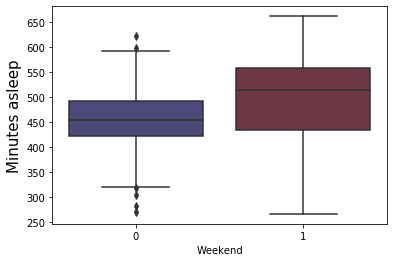

In [35]:
sns.boxplot(x=sleep_data_final['Weekend'],y=sleep_data_final['Total'].astype('timedelta64[m]'),palette='icefire')
plt.ylabel('Minutes asleep', fontsize=15)

In [36]:
print('Standard deviation (bed time):',(sleep_data_final['Total'].astype('timedelta64[m]')).std())

Standard deviation (bed time): 73.75681051489342


/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Bed time in minutes')

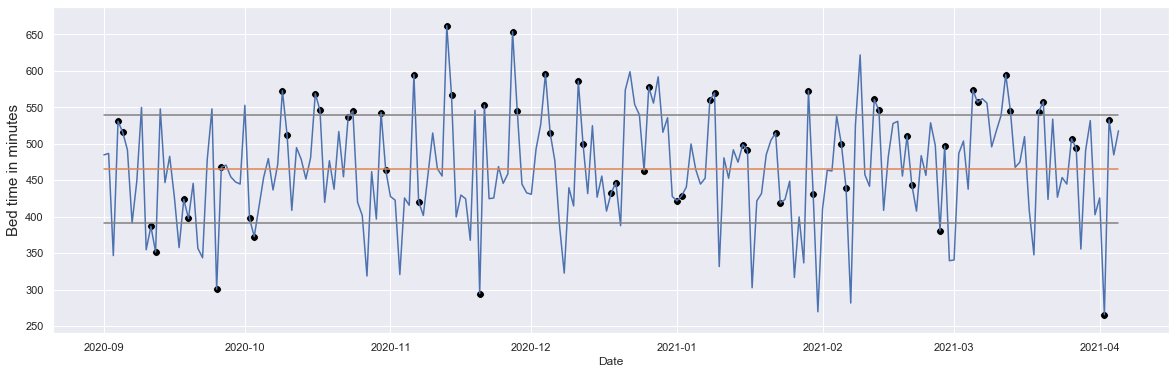

In [37]:
sns.set(rc={'figure.figsize':(20, 6)})
y = sleep_data_final['Total'].astype('timedelta64[m]')
sns.lineplot(x=sleep_data_final['Date'],y=y)
sns.scatterplot(x=sleep_data_final[sleep_data_final['Weekend']==1]['Date'],y=y,marker='o',s=60,color='black') #Weekend
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()) #Average line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()+y.std(),color='grey') #Standard deviation line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()-y.std(),color='grey') #Standard deviation line
plt.ylabel('Bed time in minutes', fontsize=15)

In [38]:
print('Standard deviation (asleep):',(sleep_data_final['Deep'].astype('timedelta64[m]')+sleep_data_final['Light'].astype('timedelta64[m]')+sleep_data_final['REM'].astype('timedelta64[m]')).std())

Standard deviation (asleep): 69.7317093105884


Text(0, 0.5, 'Minutes asleep')

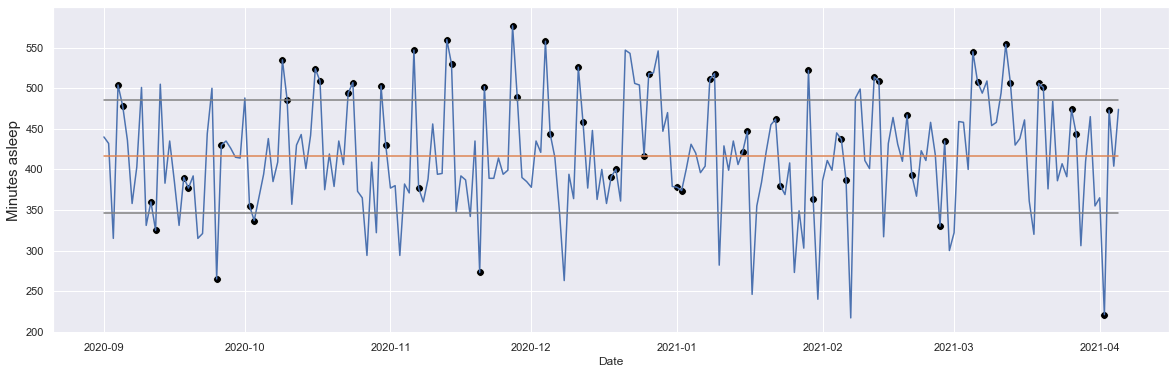

In [39]:
sns.set(rc={'figure.figsize':(20, 6)})
y = sleep_data_final['Deep'].astype('timedelta64[m]')+sleep_data_final['Light'].astype('timedelta64[m]')+sleep_data_final['REM'].astype('timedelta64[m]')
sns.lineplot(x=sleep_data_final['Date'],y=y)
sns.scatterplot(x=sleep_data_final[sleep_data_final['Weekend']==1]['Date'],y=y,marker='o',s=60,color='black') #Weekend
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()) #Average line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()+y.std(),color='grey') #Standard deviation line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()-y.std(),color='grey') #Standard deviation line
plt.ylabel('Minutes asleep', fontsize=15)

In here I only took into account minutes asleep: Deep+Light+REM without taking into account awake time. The orange line is the average number of minutes asleep, the grey ones are the standard deviation and the black dots are the weekend days.

My sleep looks quite hectic when looking at the timeline. We clearly see that I sleep more during weekends. But after having read "Why we sleep", I realise that I should have a more linear sleep time across time, even during weekends. It means that I should stick to 8-9h of sleep across all days. Currently, the standard deviation of "Minutes asleep" is at 70min. This is huge, and not stable at all.

# Analysis per hour

In [40]:
sleep_data_per_hour = sleep_data.copy()

In [41]:
def hour_matching(x):
    if x >= '00:00:00' and x < '01:00:00':
        x = '00:00:00'
    elif x >= '01:00:00' and x < '02:00:00':
        x = '01:00:00'
    elif x >= '02:00:00' and x < '03:00:00':
        x = '02:00:00'
    elif x >= '03:00:00' and x < '04:00:00':
        x = '03:00:00'
    elif x >= '04:00:00' and x < '05:00:00':
        x = '04:00:00'
    elif x >= '05:00:00' and x < '06:00:00':
        x = '05:00:00'
    elif x >= '06:00:00' and x < '07:00:00':
        x = '06:00:00'
    elif x >= '07:00:00' and x < '08:00:00':
        x = '07:00:00'
    elif x >= '08:00:00' and x < '09:00:00':
        x = '08:00:00'
    elif x >= '09:00:00' and x < '10:00:00':
        x = '09:00:00'
    elif x >= '10:00:00' and x < '11:00:00':
        x = '10:00:00'
    elif x >= '11:00:00' and x < '12:00:00':
        x = '11:00:00'
    elif x >= '12:00:00' and x < '13:00:00':
        x = '12:00:00'
    elif x >= '13:00:00' and x < '14:00:00':
        x = '13:00:00'
    elif x >= '14:00:00' and x < '15:00:00':
        x = '14:00:00'
    elif x >= '15:00:00' and x < '16:00:00':
        x = '15:00:00'
    elif x >= '16:00:00' and x < '17:00:00':
        x = '16:00:00'
    elif x >= '17:00:00' and x < '18:00:00':
        x = '17:00:00'
    elif x >= '18:00:00' and x < '19:00:00':
        x = '18:00:00'
    elif x >= '19:00:00' and x < '20:00:00':
        x = '19:00:00'
    elif x >= '20:00:00' and x < '21:00:00':
        x = '20:00:00'
    elif x >= '21:00:00' and x < '22:00:00':
        x = '21:00:00'
    elif x >= '22:00:00' and x < '23:00:00':
        x = '22:00:00'
    elif x >= '23:00:00' and x <= '23:59:00':
        x = '23:00:00'
    return x

In [42]:
sleep_data_per_hour['start_time_hour']=sleep_data_per_hour['start_time_hour'].apply(lambda x: hour_matching(x))

In [43]:
sleep_data_per_hour.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-02,01:00:00,2020-09-02,01:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-02,01:00:00,2020-09-02,01:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-02,01:00:00,2020-09-02,01:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-02,01:00:00,2020-09-02,01:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-02,01:00:00,2020-09-02,01:43:00,Light,00:10:00,2020-09-01 00:00:00


In [44]:
sleep_data_per_hour = sleep_data_per_hour[['start_time_hour','stage_of_sleep','Duration']].groupby(['start_time_hour','stage_of_sleep']).sum().reset_index()

In [45]:
sleep_data_per_hour.head()

,start_time_hour,stage_of_sleep,Duration
0,00:00:00,Awaken,01:05:00
1,00:00:00,Deep,00:52:00
2,00:00:00,Light,04:59:00
3,00:00:00,REM,00:08:00
4,01:00:00,Awaken,03:42:00


In [46]:
sleep_data_per_hour['Duration (%)'] = 0
sleep_data_per_hour = sleep_data_per_hour.append({'start_time_hour':'22:00:00','stage_of_sleep':'REM','Duration':datetime.timedelta(0)},ignore_index=True).sort_values('start_time_hour').reset_index().drop('index',axis=1)
sleep_data_per_hour = sleep_data_per_hour.append({'start_time_hour':'23:00:00','stage_of_sleep':'Deep','Duration':datetime.timedelta(0)},ignore_index=True).sort_values('start_time_hour').reset_index().drop('index',axis=1)

#sleep_data_per_hour.index = sleep_data_per_hour.index+1
for i in range(0,len(sleep_data_per_hour),4):
    sleep_data_per_hour['Duration (%)'].loc[i] = sleep_data_per_hour['Duration'].loc[i] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+1] = sleep_data_per_hour['Duration'].loc[i+1] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+2] = sleep_data_per_hour['Duration'].loc[i+2] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+3] = sleep_data_per_hour['Duration'].loc[i+3] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])    

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [47]:
sleep_data_per_hour.head()

,start_time_hour,stage_of_sleep,Duration,Duration (%)
0,00:00:00,Awaken,01:05:00,0.153302
1,00:00:00,Deep,00:52:00,0.122642
2,00:00:00,Light,04:59:00,0.705189
3,00:00:00,REM,00:08:00,0.018868
4,01:00:00,Awaken,03:42:00,0.097070


In [48]:
sleep_data_per_hour_pivot = sleep_data_per_hour[['start_time_hour','stage_of_sleep','Duration (%)']].pivot(index='start_time_hour',columns='stage_of_sleep',values='Duration (%)')

In [49]:
sleep_data_per_hour_pivot

stage_of_sleep,Awaken,Deep,Light,REM
start_time_hour,,,,
00:00:00,0.153302,0.122642,0.705189,0.018868
01:00:00,0.097070,0.148666,0.703979,0.050284
02:00:00,0.084312,0.152356,0.655261,0.108070
03:00:00,0.090842,0.136099,0.633680,0.139379
04:00:00,0.082549,0.096425,0.656867,0.164158
05:00:00,0.063364,0.090792,0.674518,0.171327
06:00:00,0.055126,0.085926,0.691044,0.167904
07:00:00,0.062836,0.071644,0.680789,0.184732
08:00:00,0.146907,0.039819,0.648488,0.164786


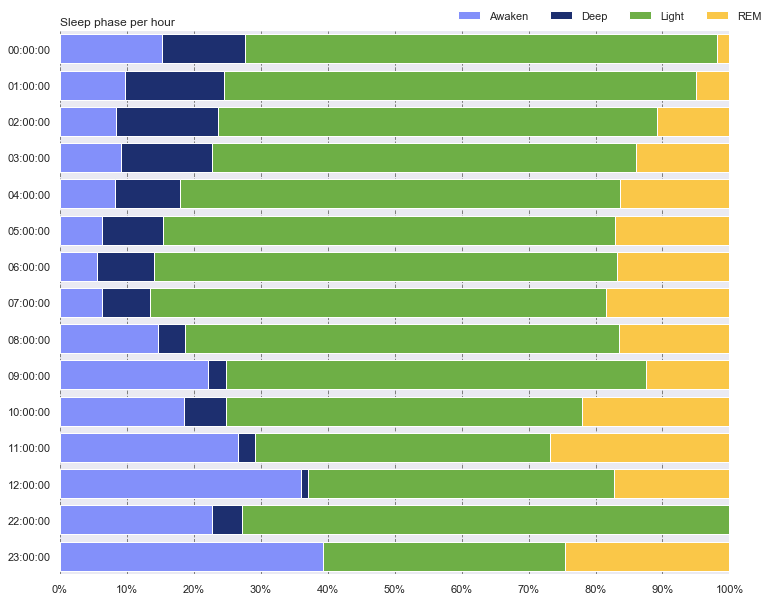

In [50]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Awaken', 'Deep', 'Light', 'REM']
colors = ['#8390FA','#1D2F6F', '#6EAF46', '#FAC748']
title = 'Sleep phase per hour'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_per_hour_pivot.sort_values('start_time_hour',ascending=False), labels, colors, title, subtitle)

<i> "We have learned that the two stages of sleep—NREM and REM—play out in a recurring, push-pull battle for brain domination across the night. **The cerebral war between the two is won and lost every ninety minutes**, ruled first by NREM sleep, followed by the comeback of REM sleep. No sooner has the battle finished than it starts anew, replaying every ninety minutes." - **Why We Sleep** </i>

We clearly see on the graph that no matter what hour of the night, on average, all sleep phases keep occuring.

| Stage        | Signification           | Description |
| ------------- | :-------------| :------------- |
| 40001      | **Awaken stage of sleep.** | Eyes open. Responsive to external stimuli. |
| 40002      | **Light stage of sleep.** | Breathing slows down and heartbeat becomes regular. Typically lasts between 1 and 20 minutes after falling asleep. |
| 40003 | **Deep stage of sleep.** | Brain waves slow down and become larger. Typically starts 35 - 45 minutes after falling asleep. |
| 40004 | **REM (Rapid Eye Movement) stage of sleep.** | Brain waves similar to waking. Most vivid dreams happen in this stage. Body does not move. |

*https://developer.samsung.com/health/server/partner-only/api-reference/data-types/sleep-stage.html*

In [51]:
x = sleep_data_per_hour[((sleep_data_per_hour['start_time_hour']>='00:00:00') & (sleep_data_per_hour['start_time_hour']<='05:00:00')) & (sleep_data_per_hour['stage_of_sleep']=='Deep')]['Duration'].mean()
y = sleep_data_per_hour[((sleep_data_per_hour['start_time_hour']>='00:00:00') & (sleep_data_per_hour['start_time_hour']<='05:00:00')) & (sleep_data_per_hour['stage_of_sleep']=='REM')]['Duration'].mean()
print("Average Deep sleep during the first half of the night (between 00:00:00 and 05:00:00):", "{0:.0%}".format(x/(x+y)))
print("Average REM sleep during the first half of the night (between 00:00:00 and 05:00:00):", "{0:.0%}".format(y/(x+y)))

print('\n')

x = sleep_data_per_hour[((sleep_data_per_hour['start_time_hour']>='06:00:00') & (sleep_data_per_hour['start_time_hour']<='11:00:00')) & (sleep_data_per_hour['stage_of_sleep']=='Deep')]['Duration'].mean()
y = sleep_data_per_hour[((sleep_data_per_hour['start_time_hour']>='06:00:00') & (sleep_data_per_hour['start_time_hour']<='11:00:00')) & (sleep_data_per_hour['stage_of_sleep']=='REM')]['Duration'].mean()
print("Average Deep sleep during the second half of the night (between 06:00:00 and 11:00:00):", "{0:.0%}".format(x/(x+y)))
print("Average REM sleep during the second half of the night (between 06:00:00 and 11:00:00):", "{0:.0%}".format(y/(x+y)))

Average Deep sleep during the first half of the night (between 00:00:00 and 05:00:00): 45%
Average REM sleep during the first half of the night (between 00:00:00 and 05:00:00): 55%


Average Deep sleep during the second half of the night (between 06:00:00 and 11:00:00): 25%
Average REM sleep during the second half of the night (between 06:00:00 and 11:00:00): 75%


<i> "A key function of **deep NREM sleep, which predominates early in the night**, is to do the work of weeding out and removing unnecessary neural connections. In contrast, **the dreaming stage of REM sleep, which prevails later in the night**, plays a role in strengthening those connections." - **Why We Sleep** </i>

When looking at my sleep data, this trend is clear! Deep and REM sleep have a very close share during the first half of the night while REM sleep is cleary dominant during the second half of the night.

# Comparison vs. step count

In [52]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,1
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [53]:
step_count_data = pd.read_excel('Step_count.xlsx')

In [54]:
sleep_data_final_step = pd.merge(sleep_data_final,step_count_data)

In [55]:
sleep_data_final_step.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Step count
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,129.0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,1762.0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,2681.0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,1,11185.0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,8562.0


In [56]:
sleep_data_final_step['Awaken']=sleep_data_final_step['Awaken'].astype('timedelta64[m]')
sleep_data_final_step['Deep']=sleep_data_final_step['Deep'].astype('timedelta64[m]')
sleep_data_final_step['Light']=sleep_data_final_step['Light'].astype('timedelta64[m]')
sleep_data_final_step['REM']=sleep_data_final_step['REM'].astype('timedelta64[m]')
sleep_data_final_step['Total']=sleep_data_final_step['Total'].astype('timedelta64[m]')

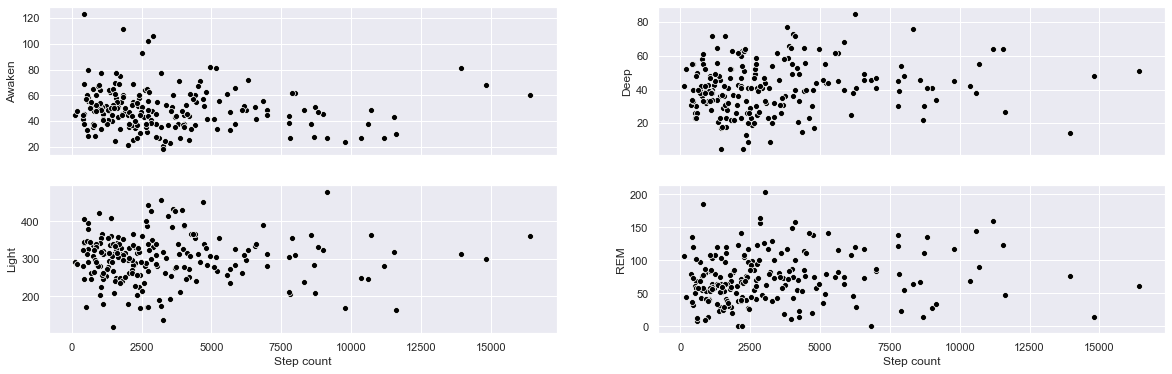

In [57]:
ig, axs = plt.subplots(nrows=2,ncols=2,sharex=True)
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Awaken'],ax=axs[0,0],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Deep'],ax=axs[0,1],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Light'],ax=axs[1,0],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['REM'],ax=axs[1,1],color='black')

In [58]:
sleep_data_final_step.corr()

,Awaken,Deep,Light,REM,Total,Weekend,Step count
Awaken,1.000000,-0.026011,0.334305,-0.289436,0.350418,-0.145368,-0.083067
Deep,-0.026011,1.000000,0.061053,0.038356,0.269041,0.046742,0.142147
Light,0.334305,0.061053,1.000000,-0.161709,0.844224,0.186876,-0.002223
REM,-0.289436,0.038356,-0.161709,1.000000,0.313798,0.265920,0.112098
Total,0.350418,0.269041,0.844224,0.313798,1.000000,0.268742,0.064532
Weekend,-0.145368,0.046742,0.186876,0.265920,0.268742,1.000000,0.239620
Step count,-0.083067,0.142147,-0.002223,0.112098,0.064532,0.239620,1.000000


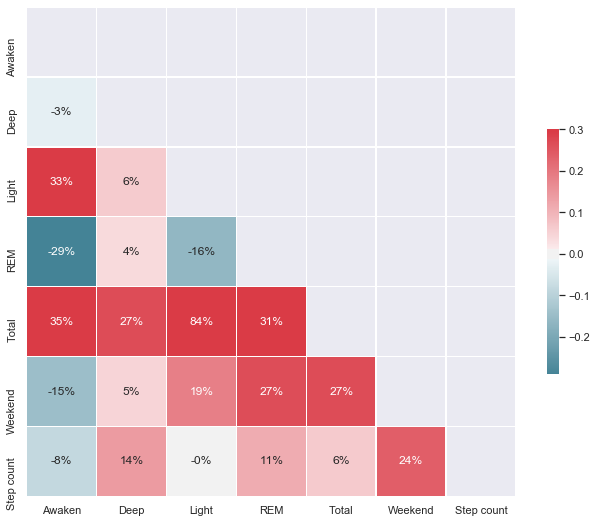

In [59]:
mask = np.zeros_like(sleep_data_final_step.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sleep_data_final_step.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='0.0%')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da
#https://github.com/mwaskom/seaborn/issues/1773

- 'Step count' is **14%** correlated with 'Deep'
- 'Step count' is **11%** correlated with 'REM'
- 'Step count' is **-8%** correlated with 'Awaken'

These might not be considered as very high correlation scores. Still, when it comes to finding correlations in human behaviours, it is worth noting.

We also have to keep in mind that correlation does not imply causation: these scores only tell us that changes in one variable are associated with changes in another variable.

# Comparison vs. GitHub activity

In [60]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,1
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [61]:
github_data = pd.read_excel('Github_activity.xlsx')

In [62]:
sleep_data_final_github = pd.merge(sleep_data_final,github_data)

In [63]:
sleep_data_final_github.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Github activity
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,1,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,0


In [64]:
sleep_data_final_github['Awaken']=sleep_data_final_github['Awaken'].astype('timedelta64[m]')
sleep_data_final_github['Deep']=sleep_data_final_github['Deep'].astype('timedelta64[m]')
sleep_data_final_github['Light']=sleep_data_final_github['Light'].astype('timedelta64[m]')
sleep_data_final_github['REM']=sleep_data_final_github['REM'].astype('timedelta64[m]')
sleep_data_final_github['Total']=sleep_data_final_github['Total'].astype('timedelta64[m]')

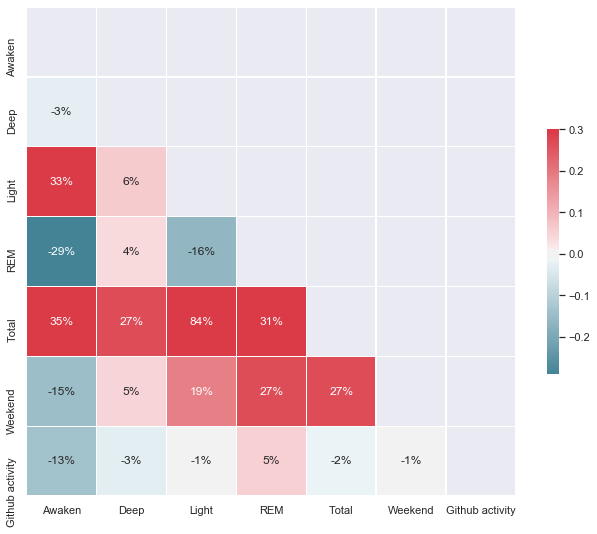

In [65]:
mask = np.zeros_like(sleep_data_final_github.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sleep_data_final_github.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='0.0%')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da
#https://github.com/mwaskom/seaborn/issues/1773

- 'Github activity' is **-13%** correlated with 'Awaken'

These correlations could be explained by the fact that I have only categorized as "1" when I was coding late at night. I wanted to assess whether late coding would affect my sleep. As a matter of fact, I usually coded until I would feel sleepy, so I did not have troubles to sleep. This could explain the negative correlation with "Awaken". 

These might not be considered as very high correlation scores. Still, when it comes to finding correlations in human behaviours, it is worth noting.

# Comparison vs. early/late sleep

In [66]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-02,01:22:00,2020-09-02,01:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-02,01:26:00,2020-09-02,01:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-02,01:29:00,2020-09-02,01:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-02,01:30:00,2020-09-02,01:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-02,01:33:00,2020-09-02,01:43:00,Light,00:10:00,2020-09-01 00:00:00


In [67]:
i=0
sleep_data=sleep_data.reset_index().drop('index',axis=1)
sleep_data_start_end = sleep_data.copy().iloc[0:0]
while i < len(sleep_data):
    if i != 0:
        sleep_data_start_end = sleep_data_start_end.append(sleep_data.loc[i-1])
    sleep_data_start_end = sleep_data_start_end.append(sleep_data.loc[i])
    i = i + len(sleep_data[sleep_data['start_time_date_reworked']==sleep_data['start_time_date_reworked'].loc[i]])

#sleep_data_start_end_final = pd.DataFrame(columns=['Date','Bed time', 'Wake time'])
sleep_data_start_end = sleep_data_start_end.reset_index().drop('index',axis=1)
for i in range(0,len(sleep_data_start_end)-1,2):
    sleep_data_start_end['end_time_hour'].loc[i] = sleep_data_start_end['end_time_hour'].loc[i+1]
    sleep_data_start_end = sleep_data_start_end.drop(i+1)

sleep_data_start_end = sleep_data_start_end.reset_index().drop(['index','start_time_date','end_time_date','stage_of_sleep','Duration'],axis=1)
sleep_data_start_end.columns = ['Bed time', 'Wake time', 'Date']

#There is a weird behaviour occuring with the last row of the table... I did not manage to correct it, I will therefore delete this row.
sleep_data_start_end.drop(sleep_data_start_end.tail(1).index,inplace=True)

#for i in range(0,len(sleep_data_start_end)):
 #   sleep_data_start_end['Bed time'] = datetime.datetime.strptime(str(sleep_data_start_end['Bed time'].loc[i]), '%H:%M:%S')

In [68]:
sleep_data_start_end.head()

,Bed time,Wake time,Date
0,01:22:00,09:27:00,2020-09-01
1,01:22:00,09:29:00,2020-09-02
2,02:02:00,07:49:00,2020-09-03
3,01:27:00,10:18:00,2020-09-04
4,03:16:00,11:52:00,2020-09-05


In [69]:
# < 1h : slept early
# > 2h30 : slept late
# < 9h : woke up early
# > 12h30 : woke up late

def early_sleep(x):
    if (x >= "22:00:00" and x <= "23:59:59") or (x >= "00:00:00" and x <= "01:00:00"):
        x = 1
    else:
        x = 0
    return x

def late_sleep(x):
    if (x >= "02:30:00" and x <= "08:00:00"):
        x = 1
    else:
        x = 0
    return x

def early_wake(x):
    if (x <= "09:00:00"):
        x = 1
    else:
        x = 0
    return x

def late_wake(x):
    if (x >= "10:30:00"):
        x = 1
    else:
        x = 0
    return x

In [70]:
sleep_data_start_end['Early sleep'] = sleep_data_start_end['Bed time'].apply(lambda x: early_sleep(x))
sleep_data_start_end['Late sleep'] = sleep_data_start_end['Bed time'].apply(lambda x: late_sleep(x))
sleep_data_start_end['Early wake'] = sleep_data_start_end['Wake time'].apply(lambda x: early_wake(x))
sleep_data_start_end['Late wake'] = sleep_data_start_end['Wake time'].apply(lambda x: late_wake(x))

In [71]:
sleep_data_start_end.head()

,Bed time,Wake time,Date,Early sleep,Late sleep,Early wake,Late wake
0,01:22:00,09:27:00,2020-09-01,0,0,0,0
1,01:22:00,09:29:00,2020-09-02,0,0,0,0
2,02:02:00,07:49:00,2020-09-03,0,0,1,0
3,01:27:00,10:18:00,2020-09-04,0,0,0,0
4,03:16:00,11:52:00,2020-09-05,0,1,0,1


In [72]:
sleep_data_final_bed_time = pd.merge(sleep_data_final,sleep_data_start_end)

In [73]:
sleep_data_final_bed_time.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Bed time,Wake time,Early sleep,Late sleep,Early wake,Late wake
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,01:22:00,09:27:00,0,0,0,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,01:22:00,09:29:00,0,0,0,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,02:02:00,07:49:00,0,0,1,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,1,01:27:00,10:18:00,0,0,0,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,03:16:00,11:52:00,0,1,0,1


In [74]:
#for i in range(0,len(sleep_data_final_bed_time)):
#    sleep_data_final_bed_time['Bed time'].loc[i] = datetime.timedelta(hours=datetime.datetime.strptime(sleep_data_start_end['Bed time'].loc[i], '%H:%M:%S').hour,minutes=datetime.datetime.strptime(sleep_data_start_end['Bed time'].loc[i], '%H:%M:%S').minute,seconds=datetime.datetime.strptime(sleep_data_start_end['Bed time'].loc[i], '%H:%M:%S').second)
#    sleep_data_final_bed_time['Wake time'].loc[i] = datetime.timedelta(hours=datetime.datetime.strptime(sleep_data_start_end['Wake time'].loc[i], '%H:%M:%S').hour,minutes=datetime.datetime.strptime(sleep_data_start_end['Wake time'].loc[i], '%H:%M:%S').minute,seconds=datetime.datetime.strptime(sleep_data_start_end['Wake time'].loc[i], '%H:%M:%S').second)

In [75]:
sleep_data_final_bed_time['Awaken']=sleep_data_final_bed_time['Awaken'].astype('timedelta64[m]')
sleep_data_final_bed_time['Deep']=sleep_data_final_bed_time['Deep'].astype('timedelta64[m]')
sleep_data_final_bed_time['Light']=sleep_data_final_bed_time['Light'].astype('timedelta64[m]')
sleep_data_final_bed_time['REM']=sleep_data_final_bed_time['REM'].astype('timedelta64[m]')
sleep_data_final_bed_time['Total']=sleep_data_final_bed_time['Total'].astype('timedelta64[m]')
#sleep_data_final_bed_time['Bed time']=sleep_data_final_bed_time['Bed time'].astype('timedelta64[h]')
#sleep_data_final_bed_time['Wake time']=sleep_data_final_bed_time['Wake time'].astype('timedelta64[h]')

In [76]:
sleep_data_final_bed_time.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Bed time,Wake time,Early sleep,Late sleep,Early wake,Late wake
0,2020-09-01,45.0,42.0,292.0,106.0,485.0,0,01:22:00,09:27:00,0,0,0,0
1,2020-09-02,55.0,47.0,328.0,57.0,487.0,0,01:22:00,09:29:00,0,0,0,0
2,2020-09-03,32.0,49.0,172.0,94.0,347.0,0,02:02:00,07:49:00,0,0,1,0
3,2020-09-04,27.0,64.0,280.0,160.0,531.0,1,01:27:00,10:18:00,0,0,0,0
4,2020-09-05,38.0,46.0,365.0,67.0,516.0,1,03:16:00,11:52:00,0,1,0,1


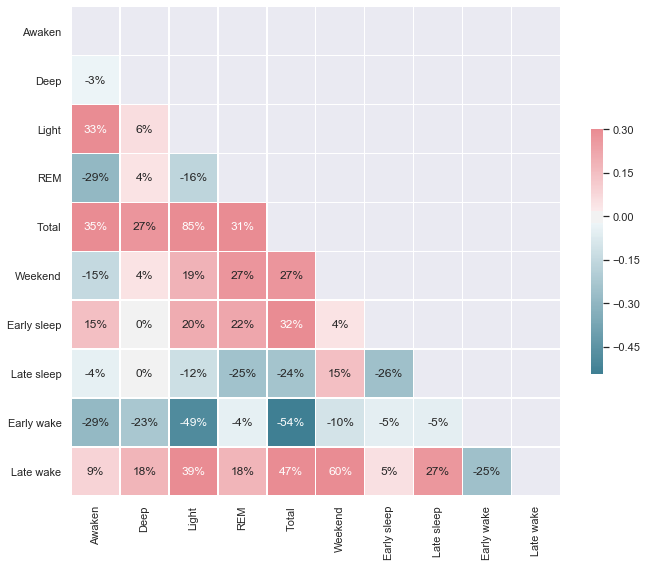

In [77]:
mask = np.zeros_like(sleep_data_final_bed_time.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sleep_data_final_bed_time.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='0.0%')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da
#https://github.com/mwaskom/seaborn/issues/1773

"Early sleep" has a **positive impact** on "Light sleep" and "REM sleep" while also increasing "Total sleep".

"Late sleep" has a **negative impact** on "REM sleep" and "Total sleep".

"Early wake" has a **strong negative impact** on "Light sleep" and "Total sleep".

"Late wake" has a **positive impact** on "Light sleep" and "Total sleep".

"Early sleep" looks more beneficial than "Late sleep", even if "Awaken" is positively correlated with "Early sleep" (I am quite sure that this is because my body is not used to early sleeping...). 

Looking at the correlation table, "late wake" looks more beneficial than "early wake". I believe that "early wake" is strongly negatively correlated with sleep because I am used to sleep late which lowers sleep time.

**I should try to sleep earlier :)**

# How long should I sleep?

In [78]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,1
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [79]:
sleep_data_final_long = sleep_data_final.copy().iloc[0:0].drop(['Date','Total','Weekend'],axis=1)
t = []
m = 0
n = ['4-5h','5-6h','6-7h','7-8h','8-9h','9-10h','10-11h','11-12h']
for i,j in zip(('04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00'),('05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00')):
    for k in ('Awaken','Deep','Light','REM'):
        t.append(sleep_data_final[(sleep_data_final['Total']>i) & (sleep_data_final['Total']<j)][k].mean())
    sleep_data_final_long.loc[m] = t
    sleep_data_final_long = sleep_data_final_long.rename(index={m:n[m]})
    t = []
    m=m+1

In [80]:
sleep_data_final_long

,Awaken,Deep,Light,REM
4-5h,00:40:30,00:30:15,02:38:45,00:48:45
5-6h,00:35:50,00:32:00,03:19:50,01:08:30
6-7h,00:43:55,00:34:37.500000,04:11:45,01:08:55
7-8h,00:49:04.736842,00:41:32.368421,04:51:33.157894,01:04:25.263157
8-9h,00:57:42.692307,00:38:15,05:34:04.615384,01:17:45
9-10h,00:48:03.428571,00:46:03.428571,06:04:39.428571,01:44:34.285714
10-11h,01:40:00,00:48:00,07:12:00,00:58:00
11-12h,01:42:00,00:55:00,07:23:00,01:02:00


In [81]:
sleep_data_final_long['Total'] = sleep_data_final_long['Awaken']+sleep_data_final_long['Deep']+sleep_data_final_long['Light']+sleep_data_final_long['REM']

In [82]:
sleep_data_final_long['Awaken'] = sleep_data_final_long['Awaken'] / sleep_data_final_long['Total']
sleep_data_final_long['Deep'] = sleep_data_final_long['Deep'] / sleep_data_final_long['Total']
sleep_data_final_long['Light'] = sleep_data_final_long['Light'] / sleep_data_final_long['Total']
sleep_data_final_long['REM'] = sleep_data_final_long['REM'] / sleep_data_final_long['Total']

sleep_data_final_long.drop('Total',axis=1,inplace=True)

In [83]:
sleep_data_final_long

,Awaken,Deep,Light,REM
4-5h,0.145553,0.108715,0.570530,0.175202
5-6h,0.106594,0.095191,0.594447,0.203768
6-7h,0.110009,0.086734,0.630623,0.172633
7-8h,0.109897,0.093014,0.652839,0.144250
8-9h,0.113653,0.075327,0.657906,0.153115
9-10h,0.085307,0.081757,0.647309,0.185627
10-11h,0.156740,0.075235,0.677116,0.090909
11-12h,0.154079,0.083082,0.669184,0.093656


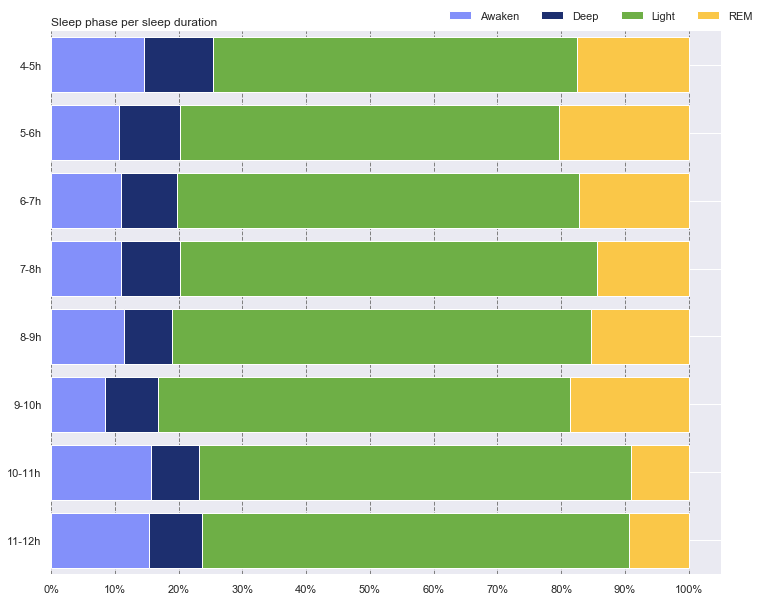

In [84]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Awaken', 'Deep', 'Light', 'REM']
colors = ['#8390FA','#1D2F6F', '#6EAF46', '#FAC748']
title = 'Sleep phase per sleep duration'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_final_long.iloc[::-1], labels, colors, title, subtitle)

In this chart, "Awaken" is included. I will need to remove it to have an accurate view on shares of sleep stages.
Still, it looks like that above 10h of sleep I have more than 15% of "Awaken". This is surely due to me lounging in bed when I have slept a lot...

In [87]:
sleep_data_final_long = sleep_data_final.copy().iloc[0:0].drop(['Awaken','Date','Total','Weekend'],axis=1)
t = []
m = 0
n = ['3-4h','4-5h','5-6h','6-7h','7-8h','8-9h','9-10h']
for i,j in zip(('03:00:00','04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'),('04:00:00','05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00')):
    for k in ('Deep','Light','REM'):
        t.append(sleep_data_final[(sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']>i) & (sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']<j)][k].mean())
    sleep_data_final_long.loc[m] = t
    sleep_data_final_long = sleep_data_final_long.rename(index={m:n[m]})
    t = []
    m=m+1

In [96]:
sleep_data_final_long

,Deep,Light,REM
3-4h,0.143836,0.659817,0.196347
4-5h,0.083562,0.718265,0.198174
5-6h,0.107121,0.682504,0.210375
6-7h,0.102520,0.737753,0.159728
7-8h,0.088159,0.744644,0.167197
8-9h,0.092926,0.715068,0.192006
9-10h,0.084187,0.690577,0.225236


In [93]:
sleep_data_final_long['Total'] = sleep_data_final_long['Deep']+sleep_data_final_long['Light']+sleep_data_final_long['REM']

In [94]:
sleep_data_final_long['Deep'] = sleep_data_final_long['Deep'] / sleep_data_final_long['Total']
sleep_data_final_long['Light'] = sleep_data_final_long['Light'] / sleep_data_final_long['Total']
sleep_data_final_long['REM'] = sleep_data_final_long['REM'] / sleep_data_final_long['Total']

sleep_data_final_long.drop(['Total'],axis=1,inplace=True)

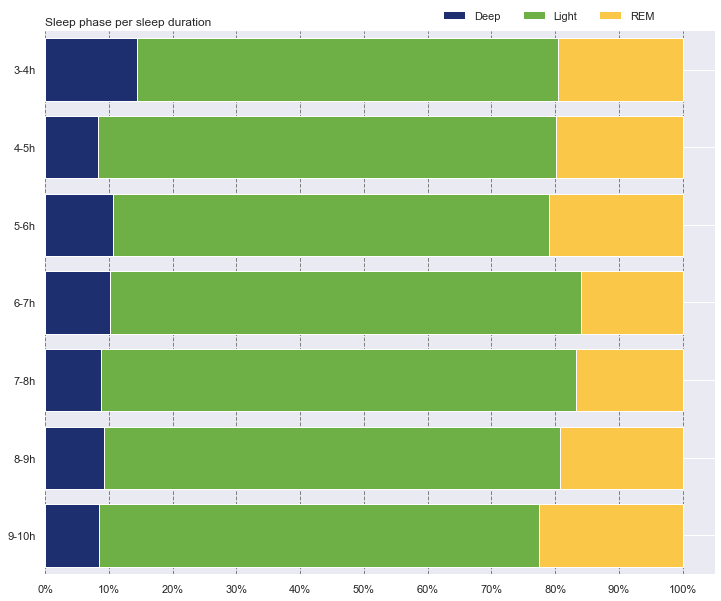

In [95]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Deep', 'Light', 'REM']
colors = ['#1D2F6F', '#6EAF46', '#FAC748']
title = 'Sleep phase per sleep duration'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_final_long.iloc[::-1], labels, colors, title, subtitle)

<i> "The total amount of time we spend asleep is markedly shorter than all other primates (**eight hours**, relative to the ten to fifteen hours of sleep observed in all other primates), yet we have a disproportionate amount of REM sleep, the stage in which we dream. **Between 20 and 25 percent of our sleep time is dedicated to REM sleep dreaming**, compared to an average of only 9 percent across all other primates!" - **Why We Sleep** </i>

Humans should sleep at least 8 hours to get enough sleep and recovery time. I have always been a sleeper, meaning if I don't put any alarm, I usually sleep up to 10 hours. When looking at the above graph, I realise that 8-10h of sleep is the one which gives me enough REM sleep (at least 20%) for my well-being.

# Sleep phases per day

In [ ]:
sleep_data_final.head()

In [ ]:
sleep_data_final['Weekday']=0

for i in range(0,len(sleep_data_final)):
    sleep_data_final['Weekday'].loc[i] = sleep_data_final['Date'].loc[i].weekday()

In [ ]:
sleep_data_final.head()

In [ ]:
sleep_data_final_weekday = sleep_data_final.copy().iloc[0:0].drop(['Date','Total','Weekend','Weekday'],axis=1)
t = []
m = 0
n = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in (0,1,2,3,4,5,6):
    for k in ('Awaken','Deep','Light','REM'):
        t.append(sleep_data_final[sleep_data_final['Weekday']==i][k].mean())
    sleep_data_final_weekday.loc[m] = t
    sleep_data_final_weekday = sleep_data_final_weekday.rename(index={m:n[m]})
    t = []
    m=m+1

In [ ]:
sleep_data_final_weekday

In [ ]:
sleep_data_final_weekday['Total'] = sleep_data_final_weekday['Awaken']+sleep_data_final_weekday['Deep']+sleep_data_final_weekday['Light']+sleep_data_final_weekday['REM']

In [ ]:
sleep_data_final_weekday['Awaken'] = sleep_data_final_weekday['Awaken'] / sleep_data_final_weekday['Total']
sleep_data_final_weekday['Deep'] = sleep_data_final_weekday['Deep'] / sleep_data_final_weekday['Total']
sleep_data_final_weekday['Light'] = sleep_data_final_weekday['Light'] / sleep_data_final_weekday['Total']
sleep_data_final_weekday['REM'] = sleep_data_final_weekday['REM'] / sleep_data_final_weekday['Total']

sleep_data_final_weekday.drop('Total',axis=1,inplace=True)

In [ ]:
sleep_data_final_weekday

In [ ]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Awaken', 'Deep', 'Light', 'REM']
colors = ['#4F3466FF','#301728FF', '#9F6B99FF', '#93385FFF']
title = 'Sleep phase per weekday'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_final_weekday.iloc[::-1], labels, colors, title, subtitle)

On average, the nights between Friday and Saturday and Saturday and Sunday (weekend) are the ones with the most REM sleep. It is because I usually sleep longer during weekends (9-10h) and as seen above, when I sleep 9-10h, I usually have more than 20% of REM sleep.

# Sleep efficiency

In [ ]:
sleep_data_final.head()

In [ ]:
sleep_data_final['Sleep efficiency'] = (sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM'])/sleep_data_final['Total']

In [ ]:
print("My average sleep efficiency is at","{0:.0%}".format(sleep_data_final['Sleep efficiency'].mean()))

In [ ]:
print("My average sleep efficiency during the week is at","{0:.0%}".format(sleep_data_final[sleep_data_final['Weekend']==0]['Sleep efficiency'].mean()))

In [ ]:
print("My average sleep efficiency during the weekend is at","{0:.0%}".format(sleep_data_final[sleep_data_final['Weekend']==1]['Sleep efficiency'].mean()))

<i> As healthy teenagers, we enjoyed a sleep efficiency of about 95 percent. As a reference anchor, **most sleep doctors consider good-quality sleep to involve a sleep efficiency of 90 percent or above**. By the time we reach our eighties, sleep efficiency has often dropped below 70 or 80 percent; 70 to 80 percent may sound reasonable until you realize that, within an eight-hour period in bed, it means you will spend as much as one to one and a half hours awake. - **Why We Sleep** </i>

I have an average sleep efficiency at 89% which can be considered as good-quality sleep.